In [ ]:
# import os
# import json
# import pandas as pd

# path = 'tuning_results_ANN/ANN/'
# folders = os.listdir(path)
# folders = [folder for folder in folders if not folder.endswith("32")]

# hyperparams = []
# val_rmse_values = []

# for folder in folders: 
#     if folder.startswith("trial"): 
#         files_in_folder = os.listdir(path + folder)
#         for file in files_in_folder:
#             if file.startswith("trial"):
               
#                 with open(path + folder + '/' + file, 'r') as f:
#                     content = json.load(f)
                
              
#                 hyperparameters = content['hyperparameters']['values']
#                 neurons = hyperparameters['neurons']
#                 num_hidden_layers = hyperparameters['num_hidden_layers']
#                 loss_function = hyperparameters['loss']
#                 batch_size = hyperparameters['batch_size']
              
#                 val_rmse = content['metrics']['metrics']['val_rmse']['observations'][0]['value'][0]
                
#                 hyperparams.append((neurons, num_hidden_layers, loss_function, batch_size))
#                 val_rmse_values.append(val_rmse)

# hyperparams_df = pd.DataFrame(list(zip(val_rmse_values, *zip(*hyperparams))), columns=['val_rmse', 'neurons', 'num_hidden_layers', 'loss_function', 'batch_size']).sort_values(by="val_rmse")

#hyperparams_df.to_csv("tuning_results_ANN/noenyshit.csv", index=False, sep="\t")

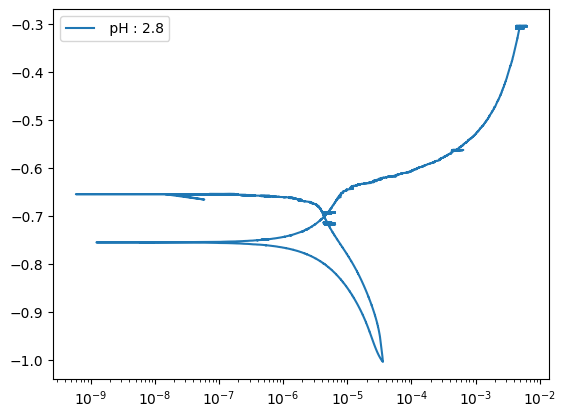

In [9]:
import matplotlib.pyplot as plt
from io import StringIO
import numpy as np
from src.load_data import list_of_filenames, load_raw_data
import os


files = list_of_filenames("raw_data")
phs_visible_pit = [2.8, 3.0, 3.6, 4.2, 4.8, 5.2, 5.6, 5.8, 6.4, 6.6, 6.8, 7.0, 7.2, 7.6, 7.8, 8.0, 8.8, 9.2, 9.6, 10.2, ]
def plot_and_return_dataframe_with_filtered_data(folder_raw: str = "raw_data"):
    
    for idx, file in enumerate(files):
        file_path_raw: str = os.path.join(folder_raw, file)
        pH: float = float(file.split("h")[1].split(",")[0] + "." + file.split(",")[1].split(".")[0])

        if pH in phs_visible_pit:
            potential_raw, current_density_raw = load_raw_data(file_path_raw)
            plt.figure()
            plt.semilogx(abs(current_density_raw), potential_raw, label = f" pH : {pH}")
            plt.legend()
            plt.show()
            
            break
            
            

plot_and_return_dataframe_with_filtered_data()

        
        